## Analysis of the Factors that Affect the Tipping of Hotel Customers

In [1]:
#Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Used pandas to read dataset and save to 'df'
df = pd.read_csv("tips.csv")

### Preliminary Exploratory Dataset Analysis

In [3]:
# Number of rows and columns in the dataset
df.shape

(244, 7)

In [4]:
# Peek view of first 5 rows of the dataset
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
#General overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


> From the summary above, there is no missing or null data among the rows and columns.
> There are 244 rows starting from 0 - 233 and 7 columns in total.
> Out of the 7 columns, two(2) consist of the float datatype, four(4) consist of strings, while one(1) consist of integers.

In [6]:
# Summary of the dataset
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


> We can deduce the summary statistics like the count, mean, standard deviation and the inter-quartile range of the df dataset.

In [7]:
#Check for the sum of all missing values in the dataset.
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### The Influence of Meal Time on Tips

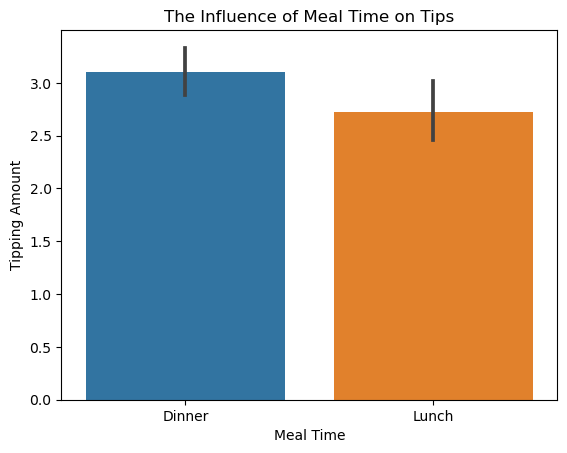

In [8]:
plt.title("The Influence of Meal Time on Tips") # Setting the plot title.

sns.barplot(data = df, x='time', y='tip') # Plotting the bar chart

#Setting the x and y labels
plt.xlabel("Meal Time")
plt.ylabel("Tipping Amount");

> From the above chart, it can be deduced that the tipping amount obtained during evening meals are more than those received during lunch.

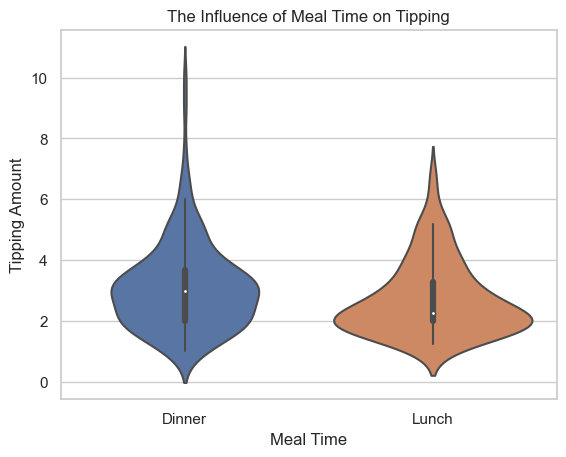

In [9]:
sns.set_theme(style="whitegrid")
plt.title("The Influence of Meal Time on Tipping")
sns.violinplot(data=df, x='time', y='tip')
plt.xlabel("Meal Time")
plt.ylabel("Tipping Amount");

> Meals taken during dinner shows a longer range of tip amount with most of it falling within 2.00 and 4.00

> Meals taken during lunch shows a shorter range but it tends to expand noticeably at it's lower inter-quartile range at 2.00 tipping amount.

> This shows that most of the tips comes during dinner and can sometimes be as high as over 10. While lesser of the tips comes during lunch with most of it falling within a certian range of 2.00 - 3.00.

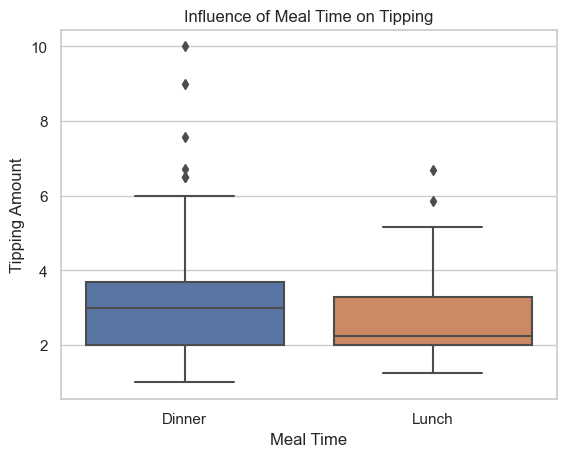

In [10]:
sns.boxplot(data = df, x = 'time', y = 'tip') # Plotting a boxplot

# Setting the x and y labels
plt.xlabel("Meal Time")
plt.ylabel("Tipping Amount")

# Setting the chart title
plt.title("Influence of Meal Time on Tipping");

> Using a boxplot to visualize the bivariate relationship between the time and tipping amount, it confirms our assumptions that meals served during dinner attracts more tipping amount with some instances of over 8, while the highest observed during lunch being a bit above 6. 

> Also, the average tipping amount for meals served during dinner is observed to be higher than the meals served at lunch.

> We can find outliers in both meal times with dinner time being much more than lunch and the interquartile range being longer.

### The Relationship between the total amount of consumption and tipping.

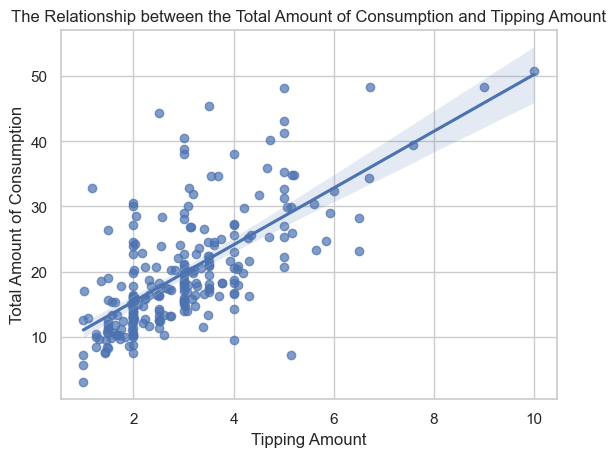

In [11]:
plt.title("The Relationship between the Total Amount of Consumption and Tipping Amount") # Setting the chart title

# plotting the chart with reduced point transparency
sns.regplot(data = df, x = 'tip', y = 'total_bill', scatter_kws={'alpha':0.7}) 

# Setting the x and y labels
plt.xlabel("Tipping Amount")
plt.ylabel("Total Amount of Consumption"); 

> With the above chart, we can assume that there is a linear correlation between the amount of consumption and the tipping amount, although there are some cases where tipping amounts increased with decreased amount of consumption. 

> The highest tip happen to come from the highest amount of consumption. While the lowest tip happen to come from the lowest amount of consumption.

> Most of the tipping amount can be found between 0 - 6

> There seem to be a noticeable cluster on the tipping amount '2' and a smaller cluster on '3'

In [12]:
def check_percent(num): # function to check percentage of a number
    two = df[df['tip'] == num].count()
    perc_two = (two / (df.count())) * 100
    print(perc_two)

In [13]:
check_percent(2.00)

total_bill    13.52459
tip           13.52459
sex           13.52459
smoker        13.52459
day           13.52459
time          13.52459
size          13.52459
dtype: float64


In [14]:
check_percent(3.00)

total_bill    9.42623
tip           9.42623
sex           9.42623
smoker        9.42623
day           9.42623
time          9.42623
size          9.42623
dtype: float64


In [15]:
check_percent(4.00)

total_bill    4.918033
tip           4.918033
sex           4.918033
smoker        4.918033
day           4.918033
time          4.918033
size          4.918033
dtype: float64


> This confirms my suspision that a noticeable amount of consumption happen to often result in tips of 2.00, 3.00 and 4.00, with the number 2.00 coming up as the most frequent number of about 13.52% out of the amount of tips given in whole.

### Relationship between Date and Tipping

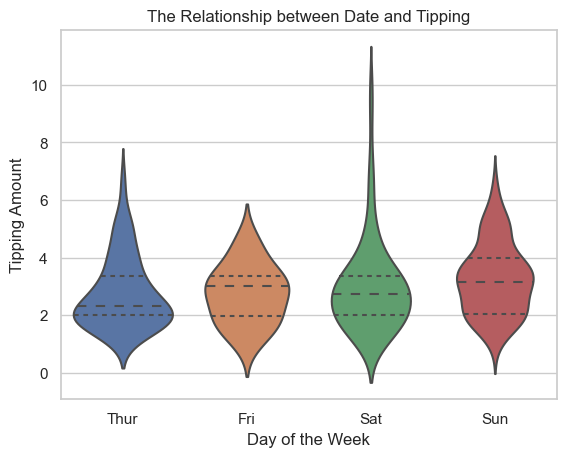

In [16]:
plt.title("The Relationship between Date and Tipping") #Setting the chart title

shuffle = ['Thur', 'Fri', 'Sat', 'Sun'] # Rearranging order of the days

sns.violinplot(data=df, x='day', y='tip', inner="quartile", order=shuffle) # Plot the graph

# Setting the x and y labels
plt.xlabel("Day of the Week")
plt.ylabel("Tipping Amount");

> From the above chart, we can deduce that Saturday has the highest total amount of tipping. With Sunday following next.

> We can also see that Thursday had a strangely high amount of 2.00 as tips. Saturday shows a very wide range of tips with most of it coming within the range of 0 and over 4.00.

> Sunday shows a short range but tends to have the highest frequency of high(3.00 - 5.00) tips. 

> Friday shows a high mean of tips

### The Impact of Gender and Smoking to Tipping

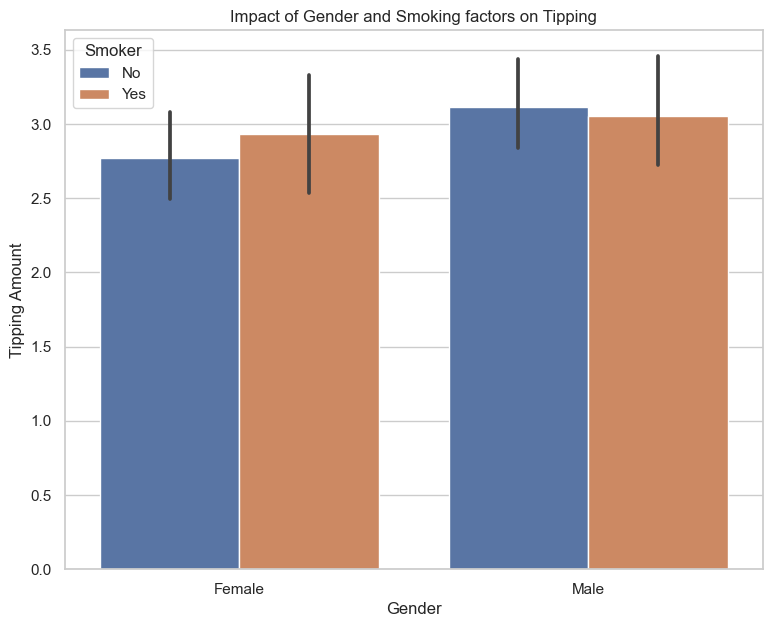

In [17]:
plt.figure(figsize=[9, 7]) # Setting the chart figure size

sns.barplot(data=df, x="sex", y="tip", hue="smoker") # Plotting the bar chart

plt.legend(title='Smoker', loc=2) # Setting the legend position to the top left

# Setting the title with the x and y labels
plt.title("Impact of Gender and Smoking factors on Tipping")
plt.xlabel("Gender")
plt.ylabel("Tipping Amount");

> We can deduce from the above chart that men tend to give more tips than women.

> It can also be deduce that for women, those that smoke give more tips than those than do not. While for men, those that do not smoke give more tips than those that smoke.

> The confidence level for those that that smoke tend to be longer than those that do not smoke. With the assumption that those that smoke may tend to give more when drunk.

### Conclusion

> In conclusion, the meal time significantly influences the tips obtained such that tips given during dinner tend to be more compared to what comes in during lunch.

> The total amount of consumption also influences chances of getting a tip such that the more the amount of consumption, the more chances are there to get some tips. It was also discovered that some tip values tend to be given much more often than other values. The most common values we discovered among the tip amounts were 2.00, 3.00 and 4.00 having the highest occurrences compared to its counterpart values.

> Based on the dates we analysed, it was discovered that saturday happens to be the day with the most chances of getting tips and the range these tips could come in were much more varied on this day compared to others. Sunday follows next in order of occurrences of tips with most of the tips falling within the range of 2.00 and 4.00. Thursday happen to have a high number of tips valued at 2.00.

> While from the relationship analysis between smoking, gender and tipping amount showed some interesting facts that men tend to give more tips than women. Also, based on those that smoked, women tend to differ in their characteristics to men as it was discovered that women that smoked gave less tips compared to men that smoked who gave more tips. Also, men and women that smoked showed a longer range of confidence level compared to those that did not smoke.


In [ ]:
!jupyter nbconvert Sceptre_Project.ipynb --to slides --post serve --no-input --no-prompt